In [1]:
import streamlit as st
import mlflow
import os
import altair as alt
import plotly.express as px
import pandas as pd
from datetime import date

In [2]:
df = pd.read_csv("../../data/processed/datos_integrados.csv", sep =";")

In [5]:
df['fecha']= pd.to_datetime(df['fecha'])

In [31]:
histo = df[(df['fecha']>"2023-04-01") & (df['fecha']<"2023-04-30") & (df['nombre']=="Adra")][['fecha','et0']]

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

pandas.core.frame.DataFrame

In [36]:
print(f"Filas encontradas: {len(histo)}")


Filas encontradas: 28


In [38]:
histo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 555103 to 555130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   28 non-null     datetime64[ns]
 1   et0     28 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 672.0 bytes


In [40]:
%matplotlib inline

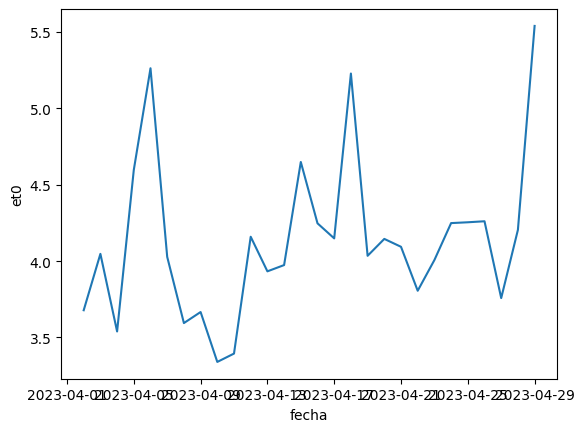

In [42]:
fig, ax = plt.subplots()
sns.lineplot(data= histo, x= 'fecha', y= 'et0')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690709 entries, 0 to 690708
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fecha             690709 non-null  object 
 1   dia               690709 non-null  int64  
 2   tempMedia         689485 non-null  float64
 3   tempMax           689588 non-null  float64
 4   horMinTempMax     690709 non-null  object 
 5   tempMin           689146 non-null  float64
 6   horMinTempMin     690709 non-null  object 
 7   humedadMedia      689194 non-null  float64
 8   humedadMax        688772 non-null  float64
 9   horMinHumMax      690709 non-null  object 
 10  humedadMin        688507 non-null  float64
 11  horMinHumMin      690709 non-null  object 
 12  velViento         681821 non-null  float64
 13  dirViento         681604 non-null  float64
 14  velVientoMax      681822 non-null  float64
 15  horMinVelMax      690709 non-null  object 
 16  dirVientoVelMax   68

In [24]:
df['fecha']= pd.to_datetime(df['fecha'])

In [29]:
sel = ['Adra','Puerto de Santa María','Santaella','Almuñecar', 'Lepe', 'Linares', 'Antequera', 'Ecija']

In [34]:
df_demo = df[(df['fecha']>"2023-01-01")& (df['nombre'].isin(sel))]
df_demo.shape

(7537, 35)

In [35]:
df_demo.to_csv("../../data/demo_app/df_demo.csv", sep=";", index=False)

In [36]:
df_demo.columns

Index(['fecha', 'dia', 'tempMedia', 'tempMax', 'horMinTempMax', 'tempMin',
       'horMinTempMin', 'humedadMedia', 'humedadMax', 'horMinHumMax',
       'humedadMin', 'horMinHumMin', 'velViento', 'dirViento', 'velVientoMax',
       'horMinVelMax', 'dirVientoVelMax', 'radiacion', 'precipitacion',
       'bateria', 'fechaUtlMod', 'et0', 'provincia_id', 'codigoEstacion',
       'nombre', 'bajoplastico', 'activa', 'visible', 'longitud', 'latitud',
       'altitud', 'xutm', 'yutm', 'huso', 'provincia_nombre'],
      dtype='object')

In [41]:
coordenadas = df_demo[['nombre','xutm', 'yutm', 'huso']].drop_duplicates()
coordenadas

,nombre,xutm,yutm,huso
41013,Puerto de Santa María,216316.92,4055676.0,30
113752,Linares,449613.00,4215286.0,30
191607,Almuñecar,439384.00,4067570.0,30
331028,Santaella,333382.00,4154500.0,30
402388,Lepe,123877.00,4136900.0,30
425041,Ecija,316625.00,4162680.0,30
555013,Adra,500683.00,4066780.0,30
627020,Antequera,361021.00,4099810.0,30


In [45]:
from src.transform_input import coordenadas_gms
coordenadas_gms(df_demo['xutm'], df_demo['yutm'])

ModuleNotFoundError: No module named 'src'

In [ ]:
st.set_page_config(
    page_title="Sistema de ayuda a la toma de desición Riego Agrícola: Olivo",
    page_icon="💧",
    layout="wide",
    initial_sidebar_state="expanded")

alt.theme.enable("dark")


with st.sidebar:
    st.title('💧 Sistema de ayuda a la toma de desición Riego Agrícola: Olivo')
    
    mun_list = list(estaciones['nombre'].unique())[::-1]
    selected_mun = st.selectbox('Selecciona un municipio', mun_list, index=len(mun_list)-1)
    df_selected_mun = df[df.nombre == selected_mun]
    color_theme_list = ['blues', 'cividis', 'greens', 'inferno', 'magma', 'plasma', 'reds', 'rainbow', 'turbo', 'viridis']
    cultivo = st.selectbox('Seleccione cultivo', "Olivo")

    fecha_inicio = list(estaciones['nombre'].unique())[::-1]



hoy = date.today()


2025-10-27 17:36:10.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


HTTPError: HTTP Error 403: Forbidden

In [11]:
fecha_inicio = list(df[df['nombre']=="Baena"]['fecha'])

In [12]:
df['fecha'] = pd.to_datetime(df['fecha'])


In [16]:
fecha_min = df['fecha'].min()
fecha_min

Timestamp('2005-01-01 00:00:00')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690709 entries, 0 to 690708
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   fecha             690709 non-null  datetime64[ns]
 1   dia               690709 non-null  int64         
 2   tempMedia         689485 non-null  float64       
 3   tempMax           689588 non-null  float64       
 4   horMinTempMax     690709 non-null  object        
 5   tempMin           689146 non-null  float64       
 6   horMinTempMin     690709 non-null  object        
 7   humedadMedia      689194 non-null  float64       
 8   humedadMax        688772 non-null  float64       
 9   horMinHumMax      690709 non-null  object        
 10  humedadMin        688507 non-null  float64       
 11  horMinHumMin      690709 non-null  object        
 12  velViento         681821 non-null  float64       
 13  dirViento         681604 non-null  float64       
 14  velV

In [16]:
df.columns

Index(['fecha', 'dia', 'tempMedia', 'tempMax', 'horMinTempMax', 'tempMin',
       'horMinTempMin', 'humedadMedia', 'humedadMax', 'horMinHumMax',
       'humedadMin', 'horMinHumMin', 'velViento', 'dirViento', 'velVientoMax',
       'horMinVelMax', 'dirVientoVelMax', 'radiacion', 'precipitacion',
       'bateria', 'fechaUtlMod', 'et0', 'provincia_id', 'codigoEstacion',
       'nombre', 'bajoplastico', 'activa', 'visible', 'longitud', 'latitud',
       'altitud', 'xutm', 'yutm', 'huso', 'provincia_nombre'],
      dtype='object')

In [ ]:
script_dir = os.path.dirname(__file__)
project_root = os.path.abspath(os.path.join(script_dir, '..', '..'))
mlruns_path = os.path.join(project_root, "mlruns")
tracking_uri = "file://" + mlruns_path 
mlflow.set_tracking_uri(tracking_uri)

model_name = "xgboost"
model_version = "2"

# Load the model from the Model Registry
model_uri = f"models:/{model_name}/{model_version}"
model = mlflow.xgboost.load_model(model_uri)



NameError: name '__file__' is not defined

In [2]:
import pandas as pd

In [5]:
X_train = pd.read_csv("../../data/final/X_test_final.csv", sep =";")
print(X_train.shape)
print(X_train.columns)

(160578, 21)
Index(['tempMedia', 'tempMax', 'tempMin', 'humedadMedia', 'humedadMax',
       'humedadMin', 'velViento', 'dirViento', 'velVientoMax',
       'dirVientoVelMax', 'radiacion', 'precipitacion', 'altitud', 'lon',
       'lat', 'dia_del_año_sin', 'dia_del_año_cos', 'año', 'mes', 'mes_sin',
       'mes_cos'],
      dtype='object')


In [6]:
X_train = pd.read_csv("../../data/processed/datos_integrados.csv", sep =";")
print(X_train.shape)
print(X_train.columns)

(690709, 35)
Index(['fecha', 'dia', 'tempMedia', 'tempMax', 'horMinTempMax', 'tempMin',
       'horMinTempMin', 'humedadMedia', 'humedadMax', 'horMinHumMax',
       'humedadMin', 'horMinHumMin', 'velViento', 'dirViento', 'velVientoMax',
       'horMinVelMax', 'dirVientoVelMax', 'radiacion', 'precipitacion',
       'bateria', 'fechaUtlMod', 'et0', 'provincia_id', 'codigoEstacion',
       'nombre', 'bajoplastico', 'activa', 'visible', 'longitud', 'latitud',
       'altitud', 'xutm', 'yutm', 'huso', 'provincia_nombre'],
      dtype='object')


In [52]:
from datetime import date
hoy = date.today()
hoy.timetuple().tm_yday

300

In [53]:
coordenadas = df[['nombre','provincia_nombre','xutm', 'yutm', 'altitud']].drop_duplicates()
coordenadas

,nombre,provincia_nombre,xutm,yutm,altitud
0,Basurta-Jerez de la Frontera,Cádiz,230650.0,4072170.0,39
7404,Conil de la Frontera,Cádiz,218803.0,4025430.0,22
14432,IFAPA Centro de Chipiona,Cádiz,196448.0,4072630.0,7
21909,Jerez de la Frontera,Cádiz,230594.0,4059470.0,17
29385,Jimena de la Frontera,Cádiz,286263.0,4032470.0,50
...,...,...,...,...,...
653230,IFAPA Churriana,Málaga,365680.0,4059740.0,17
660722,Málaga,Málaga,362741.0,4068970.0,55
668228,Pizarra,Málaga,346918.0,4070360.0,71
675706,Sierra Yeguas,Málaga,336928.0,4111800.0,467


In [54]:
selected_mun="Pizarra"

In [55]:

coordenadas[coordenadas['nombre']==selected_mun].altitud

668228    71
Name: altitud, dtype: int64

In [57]:
import streamlit as st
import mlflow
import os
import altair as alt
import plotly.express as px
import pandas as pd
from datetime import date
from joblib import load


st.set_page_config(
    page_title="Sistema de ayuda a la toma de desición Riego Agrícola: Olivo",
    page_icon="💧",
    layout="wide",
    initial_sidebar_state="expanded")

alt.theme.enable("dark")

df = pd.read_csv("data/demo_app/df_demo.csv", sep =";")

coordenadas = df[['nombre','provincia_nombre','xutm', 'yutm', 'altitud']].drop_duplicates()
lon, lat =coordenadas_gms(coordenadas["xutm"],coordenadas["yutm"])

with st.sidebar:
    st.title('💧 Sistema de ayuda a la toma de desición Riego Agrícola: Olivo')
    
    mun_list = sorted(list(df['nombre'].unique()), reverse=True)
    selected_mun = st.selectbox('Selecciona un municipio', mun_list, index=len(mun_list)-1)
    df_selected_mun = df[df.nombre == selected_mun]
    color_theme_list = ['blues', 'cividis', 'greens', 'inferno', 'magma', 'plasma', 'reds', 'rainbow', 'turbo', 'viridis']
    cultivo = st.selectbox('Seleccione cultivo', "Olivo")

    df['fecha'] = pd.to_datetime(df['fecha'])

    if selected_mun:
        df_mun = df[df['nombre']==selected_mun]
        fecha_min = df_mun['fecha'].min()
        fecha_max = df_mun['fecha'].max()
        st.write(f"Datos disponibles para esta estación desde el {fecha_min} hasta el {fecha_max}")
        rango_seleccionado = st.date_input("Selecciona un rango de fechas",
            value=(fecha_min, fecha_max), 
            min_value=fecha_min,               
            max_value=fecha_max               
        )

        if len(rango_seleccionado) == 2:
            fecha_inicio = rango_seleccionado[0]
            fecha_fin = rango_seleccionado[1]
            
            st.success(f"Rango seleccionado: {fecha_inicio} al {fecha_fin}")
            
        else:
            st.warning("No hay datos para la estación seleccionada.")


hoy = date.today()
año, mes, dia_año = extract_fecha(hoy)
sin_mes, cos_mes = transform_mes_año(mes)
sin_dia_año, cos_dia_año = transform_dia_año(dia_año)

modelo = load('notebooks/modelado/XGBoost_modelo_final.joblib')
scaler = load('notebooks/preparacion_datos/standard_scaler.joblib')



st.header("Realizar una Nueva Predicción 📝")

with st.form("formulario_prediccion"):
    
    st.write("Introduce los parámetros meteorológicos diarios:")
    
    col1, col2, col3= st.columns(3)
    
    with col1:
        temp_max = st.number_input(
            "Temperatura Máxima (°C)", 
            min_value=0.0, 
            max_value=50.0, 
            value=22.5, 
            step=0.1
        )
        temp_min = st.number_input(
            "Temperatura Mínima (°C)", 
            min_value=-20.0, 
            max_value=40.0, 
            value=22.5, 
            step=0.1
        )

    with col2:
        humedad_max = st.slider(
            "Humedad Relativa Máxima(%)", 
            min_value=0, 
            max_value=100, 
            value=65
        )   
        humedad_min = st.slider(
            "Humedad Relativa Mínima (%)", 
            min_value=0, 
            max_value=100, 
            value=65
        )          


    with col3:
        viento = st.number_input(
            "Velocidad del Viento (m/s)", 
            min_value=0.0, 
            max_value=20.0, 
            value=2.0, 
            step=0.1
        )
        submitted = st.form_submit_button("Ejecutar Predicción")



mun_data = coordenadas[coordenadas['nombre']==selected_mun]

lon, lat = coordenadas_gms(mun_data.xutm, mun_data.yutm)
if submitted:
    st.markdown("---")
    st.subheader("Resultado de la Predicción")

    # 1. Recolectar datos en un diccionario
    datos_para_modelo = {
        'tempMax': temp_max,
        'tempMin': temp_min,
        'humedadMax': humedad_max,
        'humedadMin': humedad_min,
        'velViento': viento,
        'altitud': mun_data.altitud,
        'lon': lon,
        'lat': lat,
        'dia_del_año_sin': sin_dia_año,
        'dia_del_año_cos': cos_dia_año, 
        'año': año, 
        'mes': mes, 
        'mes_sin': sin_mes, 
        'mes_cos': cos_mes
    }
    
    input = pd.DataFrame(datos_para_modelo)
    input = scaler.fit(input.astype(float))

    with st.spinner("Ejecutando modelo..."):
        
        resultado_prediccion = modelo.predict(input)
    
    
    st.success("¡Predicción completada!")
    
    
    st.metric(
        label="Evapotranspiración (ETo) Predicha",
        value=f"{resultado_prediccion:.2f} mm/día"
    )
    


2025-10-27 22:50:32.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


FileNotFoundError: [Errno 2] No such file or directory: 'data/demo_app/df_demo.csv'